## DSCI 100 007 Group 37 Final Report




#### Assessing Heart Disease Risks: To use the Cleveland Heart Disease Data to predict whether a patient has heart disease or not based on their resting blood pressure, maximum heart rate, sex, age, and cholesterol levels using classification.

   Heart disease is a general term that refers to a range of several heart conditions. Considering that heart disease is the second leading cause of death in Canada (1),  it is of utmost importance for us to be able to accurately detect and treat heart disease in as many people as possible, as soon as possible. Because these conditions can be hard to identify before acute and potentially fatal symptoms arise, using the “Cleveland Heart Disease Data” obtained from the UCI Machine Learning Repository (2), we aim to classify a patient’s potential of developing heart disease based on five factors. These factors include their resting blood pressure, maximum heart rate, sex, age, and cholesterol levels. We chose these predictors because the literature on heart disease lists these factors as some of the more influential risk factors in heart disease development. According to the CDC, two of the leading risk factors include cholesterol levels and blood pressure (3, 4), and age, sex, and heart rate have been previously associated with heart disease (5, 6, 7)  Using these predictors, we created a model using K-nearest neighbours classification to detect heart disease.

In [2]:
install.packages("psych")

also installing the dependency ‘mnormt’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(tidyverse)
library(psych)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ psych::%+%()      masks ggplot2::%+%()
✖ scales::alpha()   masks psych::alpha(), ggplot

##### Step 1 : read data from url

This step was to load in the data with a read_csv function.

In [4]:
path <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_disease_data <-read_csv(path)
heart_disease_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


##### Step 2 : Naming and filtering data

We tidied our data by adding column names. 

In [5]:
# Give each column a specific name from given dataset
heart_disease_data <- read_csv(path, col_names = FALSE) |> 
  set_names(c("age", "sex", "cp", "trestbpd", "chol", "fbs", "restecg", "thalach",
              "exang", "oldpeak", "slope", "ca", "thal", "num"))
heart_disease_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbpd,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


##### Table 1: Raw Heart Disease Data

##### Step 3 : Wrangling and cleaning data by selecting only chosen predictors and modify num (target) to 0 & 1 only

The data is being filtered for the columns "age", "sex", "trestbpd"(The resting blood pressure mmHg), "chol"(cholesterol), "thalach"(maximum heart rate achieved), and "num"(whether they had heart disease). Age, sex, resting blood pressure, cholesterol, and maximum heart rate achieved were the five predictors used to predict the value of the "num" column indicating heart disease. 
We modified the 1-4 values of severity seen in the num column to absent (0) and present (1) using an ifelse() argument, as we were only determining if the patient has heart disease or not. The data was also filtered to remove "?" data points since we only wanted numbers for prediction. We needed to treat num as a category so we converted it into a factor using the as_factor() and mutate() functions.



In [6]:
filtered_heart_disease_data1 <- heart_disease_data |>
  select(1, 2, 4, 5, 8, 14)

changed_num2 <- filtered_heart_disease_data1 |>
  mutate(num = ifelse(num >= 1, 1, 0))
# remove all row with '?'
changed_num_3 <- changed_num2 |>
  filter_all(all_vars(. != "?"))

final_data1 <- changed_num_3
final_data1 <- final_data1 |>
    mutate(num = as_factor(num))
final_data1

age,sex,trestbpd,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,150,0
67,1,160,286,108,1
67,1,120,229,129,1
⋮,⋮,⋮,⋮,⋮,⋮
57,1,130,131,115,1
57,0,130,236,174,1
38,1,138,175,173,0


##### Table 2: Heart Disease Data for Analysis

##### Step 4 : Split Data into training and testing data

After the data was tidied we prepared the classification by splitting the data with 75% in a training set and the rest in a testing set. We included a seed in this step and all future steps that used randomness to ensure reproducibility of our results.

In [7]:
set.seed(9999)

heart_disease_split1 <- initial_split(final_data1, prop = 0.75, strata = num)

In [8]:
heart_disease_train1 <- training(heart_disease_split1)
heart_disease_train1

age,sex,trestbpd,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,145,233,150,0
37,1,130,250,187,0
41,0,130,204,172,0
⋮,⋮,⋮,⋮,⋮,⋮
57,0,140,241,123,1
45,1,110,264,132,1
57,1,130,131,115,1


##### Table 3: Heart Disease Training Data

In [9]:
heart_disease_test1 <- testing(heart_disease_split1)
heart_disease_test1

age,sex,trestbpd,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
67,1,160,286,108,1
57,0,120,354,163,0
63,1,130,254,147,1
⋮,⋮,⋮,⋮,⋮,⋮
68,1,144,193,141,1
57,0,130,236,174,1
38,1,138,175,173,0


##### Table 4: Heart Disease Testing Data

##### Step 5: Make summary for Exploratory Data

In [10]:
describe(heart_disease_train1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,227,54.4933921,8.7164629,55,54.601093,8.8956,34,77,43,-0.1300668,-0.4441941,0.57853196
sex,2,227,0.6651982,0.4729640,1,0.704918,0.0000,0,1,1,-0.6954884,-1.5229468,0.03139173
trestbpd,3,227,131.7973568,18.1557517,130,130.546448,14.8260,94,200,106,0.7272229,0.9437541,1.20503957
chol,4,227,246.5638767,53.8300268,240,244.049180,50.4084,126,564,438,1.1738845,4.7696730,3.57282437
thalach,5,227,148.8678414,22.8765478,152,150.071038,23.7216,88,195,107,-0.4567269,-0.4767998,1.51836981
num*,6,227,1.4581498,0.4993466,1,1.448087,0.0000,1,2,1,0.1668815,-1.9808185,0.03314280


What the describe() function shows us here are some notable statistics from our dataset, which makes inital analysis and interpretation of our results easier. The most relevant columns include "n", showing that we have a somewhat smaller dataset with a total of 227 observations, as well as standard deviation (sd), median, minimum value (min), and maximum value (max). These all help us analyze the distribution of potential predictors in each observation to see how our data behaves.

##### Table 5: Summary of Training Data

##### Step 5: Visualization of data set for exploratory data

We visualized the raw data as three plots.

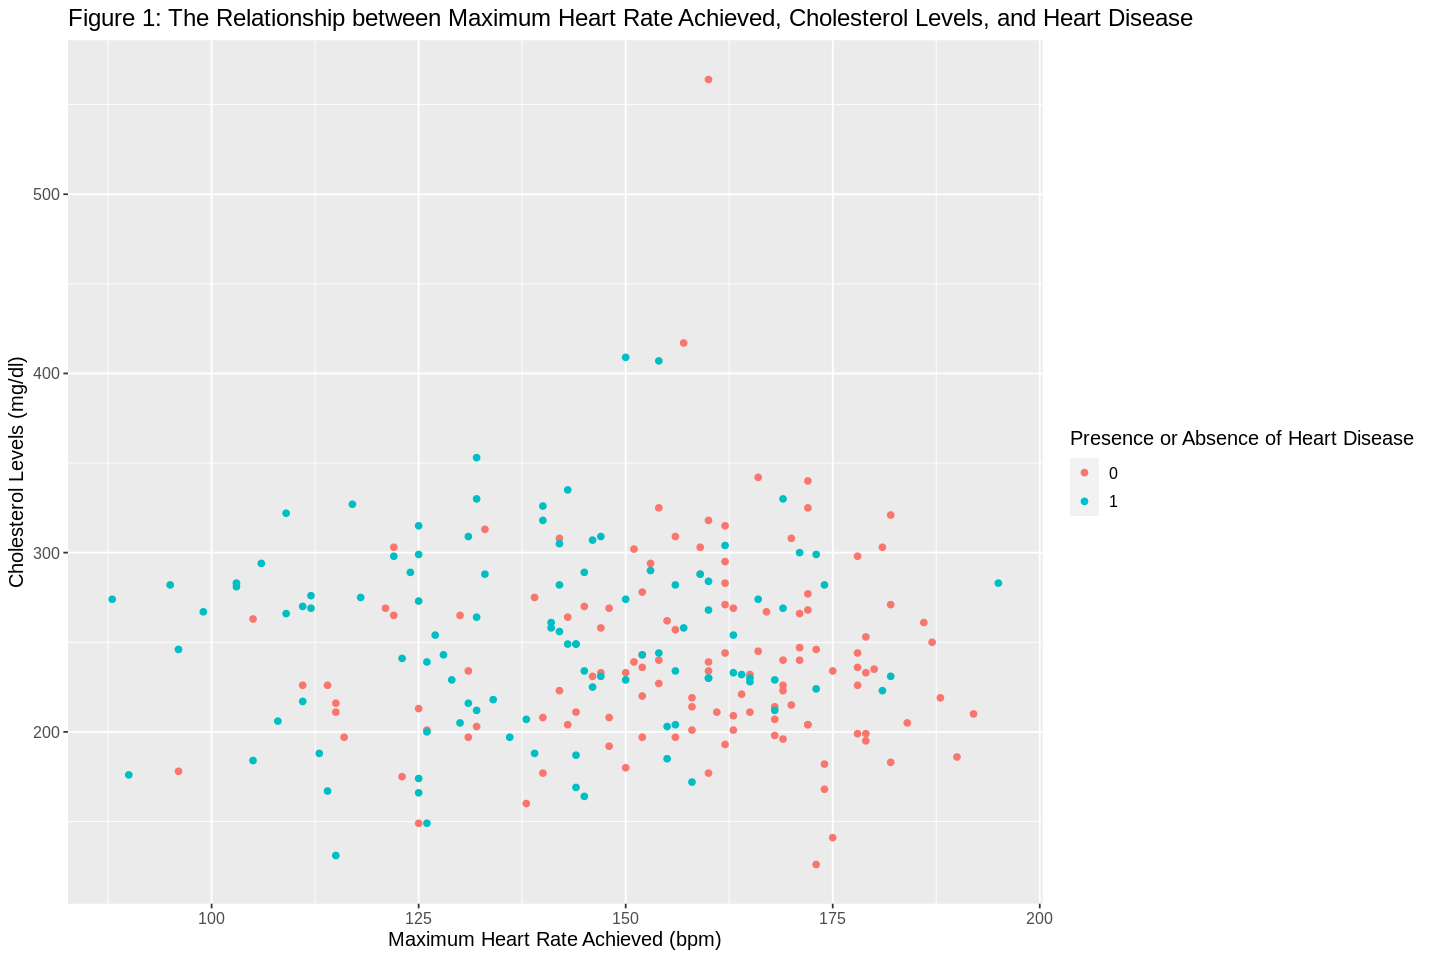

In [11]:
options(repr.plot.width = 12, repr.plot.height = 8)
heart_disease_plot <- heart_disease_train1 |>
    ggplot(aes(x = thalach, y = chol, color = num))+
    geom_point() +
    labs(x = "Maximum Heart Rate Achieved (bpm)", y = "Cholesterol Levels (mg/dl)", colour = "Presence or Absence of Heart Disease")+
    #0 is absence, 1 is presence
    ggtitle("Figure 1: The Relationship between Maximum Heart Rate Achieved, Cholesterol Levels, and Heart Disease") +
    theme(text = element_text(size = 12))
heart_disease_plot

We used a scatterplot to show the relationship between maximum heart rate achieved, cholesterol, and heart disease. From this visualization we see a very scattered set of data (with a few outliers in regards to cholesterol levels), showing no overall correlation between cholesterol levels and maximum heart rate. There also appears to be a very minimal tendency for people with no heart disease to have higher maximum heart rates, but this correlation is certainly weak. This is because though there is slight grouping of coloured data points, there are still a considerable number of people with heart disease that had low heart rates as well as high heart rates.

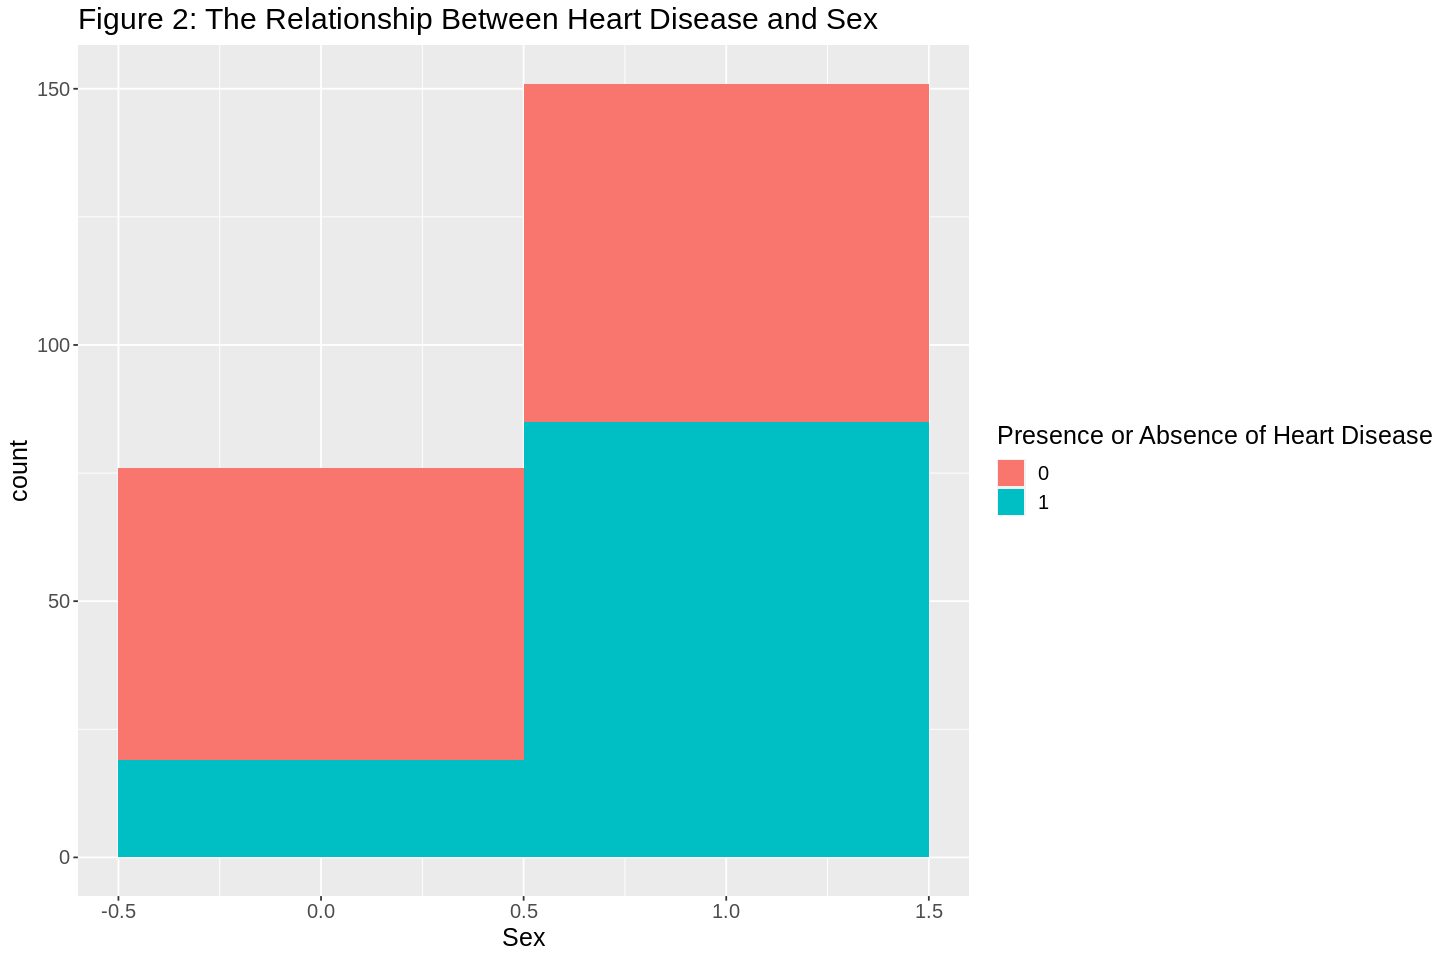

In [12]:
options(repr.plot.width = 12, repr.plot.height = 8)
heart_disease_plot1 <- heart_disease_train1 |>
    ggplot(aes(x = sex, fill = num))+
    geom_histogram(binwidth = 1) +
    labs(x = "Sex", fill = "Presence or Absence of Heart Disease")+
    #0 is absence, 1 is presence
    ggtitle("Figure 2: The Relationship Between Heart Disease and Sex")+
    #0 is female, 1 is male
    theme(text = element_text(size = 15))
heart_disease_plot1

We used a histogram to illustrate the split between sexes in heart disease likelihood. This plot seems to suggest that males are more likely to have heart disease than females because the male bin (from 0.5-1) has a much higher proportion of heat disease diagnosises (1) than the female bin(0-0.5). We also note that there are nearly twice the number of males in this dataset relative to females. 

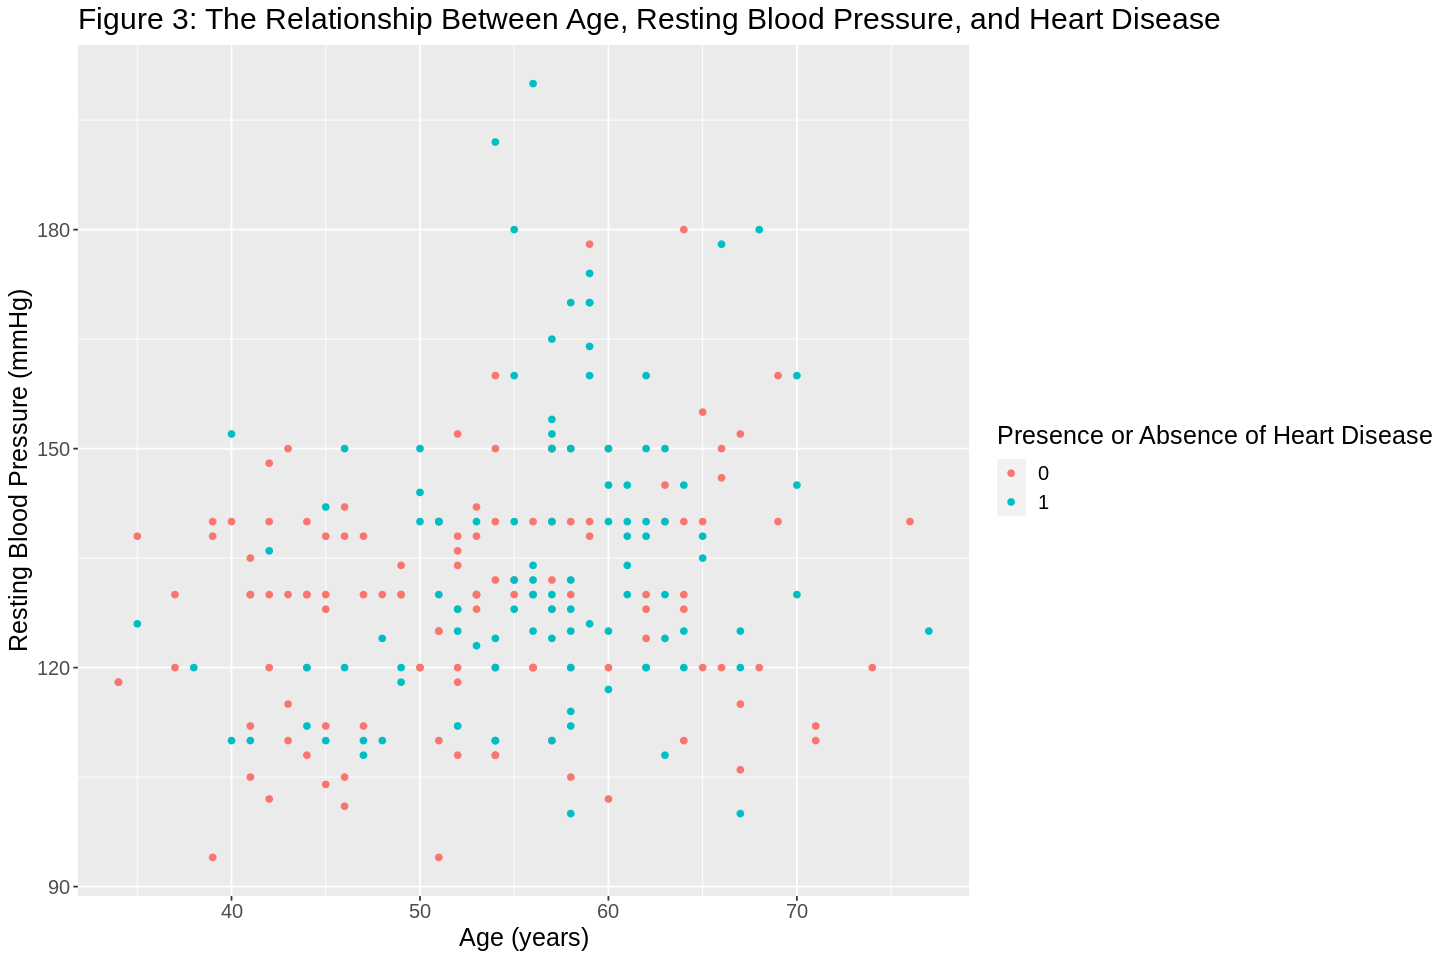

In [13]:
options(repr.plot.width = 12, repr.plot.height = 8)
heart_disease_plot2 <- heart_disease_train1 |>
    ggplot(aes(x = age, y = trestbpd, color = num))+
    geom_point() +
    labs(x = "Age (years)", y = "Resting Blood Pressure (mmHg)", colour = "Presence or Absence of Heart Disease")+
    #0 is absence, 1 is presence
    ggtitle("Figure 3: The Relationship Between Age, Resting Blood Pressure, and Heart Disease")+
    theme(text = element_text(size = 15))
heart_disease_plot2

We used a scatter plot again to visualize the relationship between age, resting blood pressure, and heart disease. We can see no correlation between any of these factors, as the data points are spread across the graph relatively evenly and there is no clustering of colors based on heart disease.

##### Step 6: Create a model specification with neighbours = tune(),  recipe, and split up training data for cross-validation 

We used a nearest neighbor function with neighbors = tune() to find the model. Then we created a scaled and centered recipe from the training data. We then performed a 5 fold cross-validation on the training data.

In [14]:
set.seed(9999)

heart_disease_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
    set_engine("kknn")|>
    set_mode("classification")
heart_disease_tune

heart_disease_recipe <- recipe(num ~ trestbpd + chol + age + sex + thalach, data = heart_disease_train1)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())
heart_disease_recipe

heart_disease_vfold <- vfold_cv(heart_disease_train1, v = 5, strata = num)
    

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

##### Step 7: Create a Workflow and estimate classifier accuracy for K nearest neighbour ranging from 1 to 100

We set up a tibble to use k values ranging from 1 to 100 jumping by 2s to increase the range used to find k and improve accuracy. Then we created a workflow using the recipe and model from step 6 and used it along with tune_grid and collect_metrics functions to estimate classifier accuracy for the knn values from 1 to 100.

In [15]:
grid_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 2))

heart_disease_tune_workflow <- workflow()|>
    add_recipe(heart_disease_recipe)|>
    add_model(heart_disease_tune)|>
    tune_grid(resamples = heart_disease_vfold, grid = grid_vals)|>
    collect_metrics()
heart_disease_tune_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6432235,5,0.02512895,Preprocessor1_Model01
1,roc_auc,binary,0.6415238,5,0.02362951,Preprocessor1_Model01
3,accuracy,binary,0.6433202,5,0.01520974,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
97,roc_auc,binary,0.7899504,5,0.03348719,Preprocessor1_Model49
99,accuracy,binary,0.6875845,5,0.01760066,Preprocessor1_Model50
99,roc_auc,binary,0.7846746,5,0.03449404,Preprocessor1_Model50


##### Table 6: Collect Metrics

##### Step 8: Create a plot to determine the K with the highest accuracy

We filtered for only the accuracy metric to make the plot. Then created a visualization of accuracies at different k values to find the best one to use in the model. The visualization uses ggplot to create line plot from the points and shows that a k with the highest peak has the highest estimated accuracy.

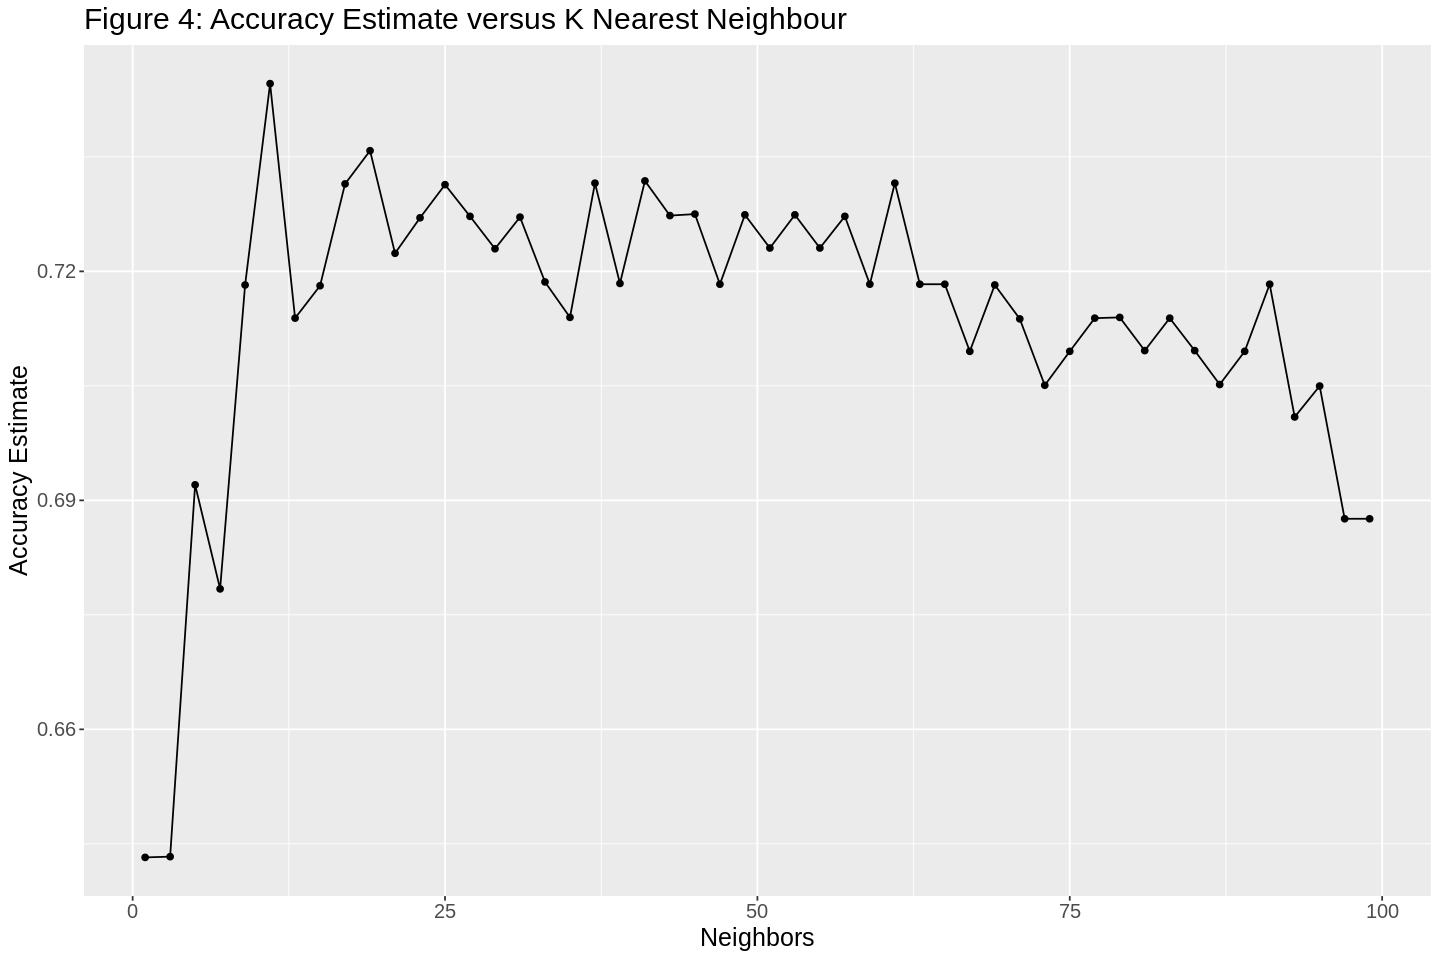

In [16]:
accuracies <- heart_disease_tune_workflow|>
    filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point()+
    geom_line()+
    ggtitle("Figure 4: Accuracy Estimate versus K Nearest Neighbour")+
    labs(x = "Neighbors", y = "Accuracy Estimate")+
    theme(text = element_text(size = 15))

accuracy_vs_k

##### Step 9: Create a new model specification for the best k and retrain classifier using fit

We used accuracies1 to pull the k with the highest accuracy (k = 11). This k value was plugged into a new k nearest neighbors model. The model is then retrained using a fit function in a workflow.

In [17]:
accuracies1 <- heart_disease_tune_workflow|>
    filter(.metric == "accuracy")|>
    select(neighbors, mean)|>
    arrange(desc(mean))|>
    head(1)|>
    pull(neighbors)

set.seed(9999)

heart_disease_model <- nearest_neighbor(weight_func = "rectangular", neighbors = accuracies1)|>
    set_engine("kknn")|>
    set_mode("classification")

heart_disease_best_fit <- workflow()|>
    add_recipe(heart_disease_recipe)|>
    add_model(heart_disease_model)|>
    fit(data = heart_disease_train1)
heart_disease_best_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.30837
Best kernel: rectangular
Best k: 11

##### Step 10: Compute accuracy on testing data 

We used the fitted data to predict the test data set by running it through a metrics function. It found that our workflow gave an accuracy of 0.71 making it 71% correct. 

In [18]:
heart_disease_prediction <- heart_disease_best_fit |>
        predict(heart_disease_test1) |>
        bind_cols(heart_disease_test1)|>
        metrics(truth = num, estimate = .pred_class)
heart_disease_prediction

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7105263
kap,binary,0.4100212


##### Table 7: Accuracy of model

##### Step 11: Create confusion matrix of test data to show the table of predicted labels and correct labels. Use Recall and Precision mertrics to assess accuracy of model.

We created a confusion matrix from the fit data to further evaluate the model by creating a table of predicted labels vs correct labels.

In [19]:
confusion_mat<- heart_disease_best_fit |>
        predict(heart_disease_test1) |>
        bind_cols(heart_disease_test1)|>
    conf_mat(truth = num, estimate = .pred_class)
confusion_mat

          Truth
Prediction  0  1
         0 33 14
         1  8 21

##### Table 8: Confusion Matrix

We input our numbers from the confusion matrix into a recall and a precision equation format to find those values and assess how accurate our model is. Recall is true positive /(true positive + False positive). Precision is true positive/(true positive + false negative). Recall is 0.6 or 60% and precision is 0.72 or 72%.

In [20]:
recall <- 21/(21+14)
recall

precision <- 21/(21+8)
precision

[1] 0.6

[1] 0.7241379

##### Step 12: Create a Visualization of Analysis using Confusion Matrix

We converted the original confusion matrix into a visualization for better analysis using ggplot. The visualization includes a frequency gradient for each quadrant to show the more common outcomes darker.

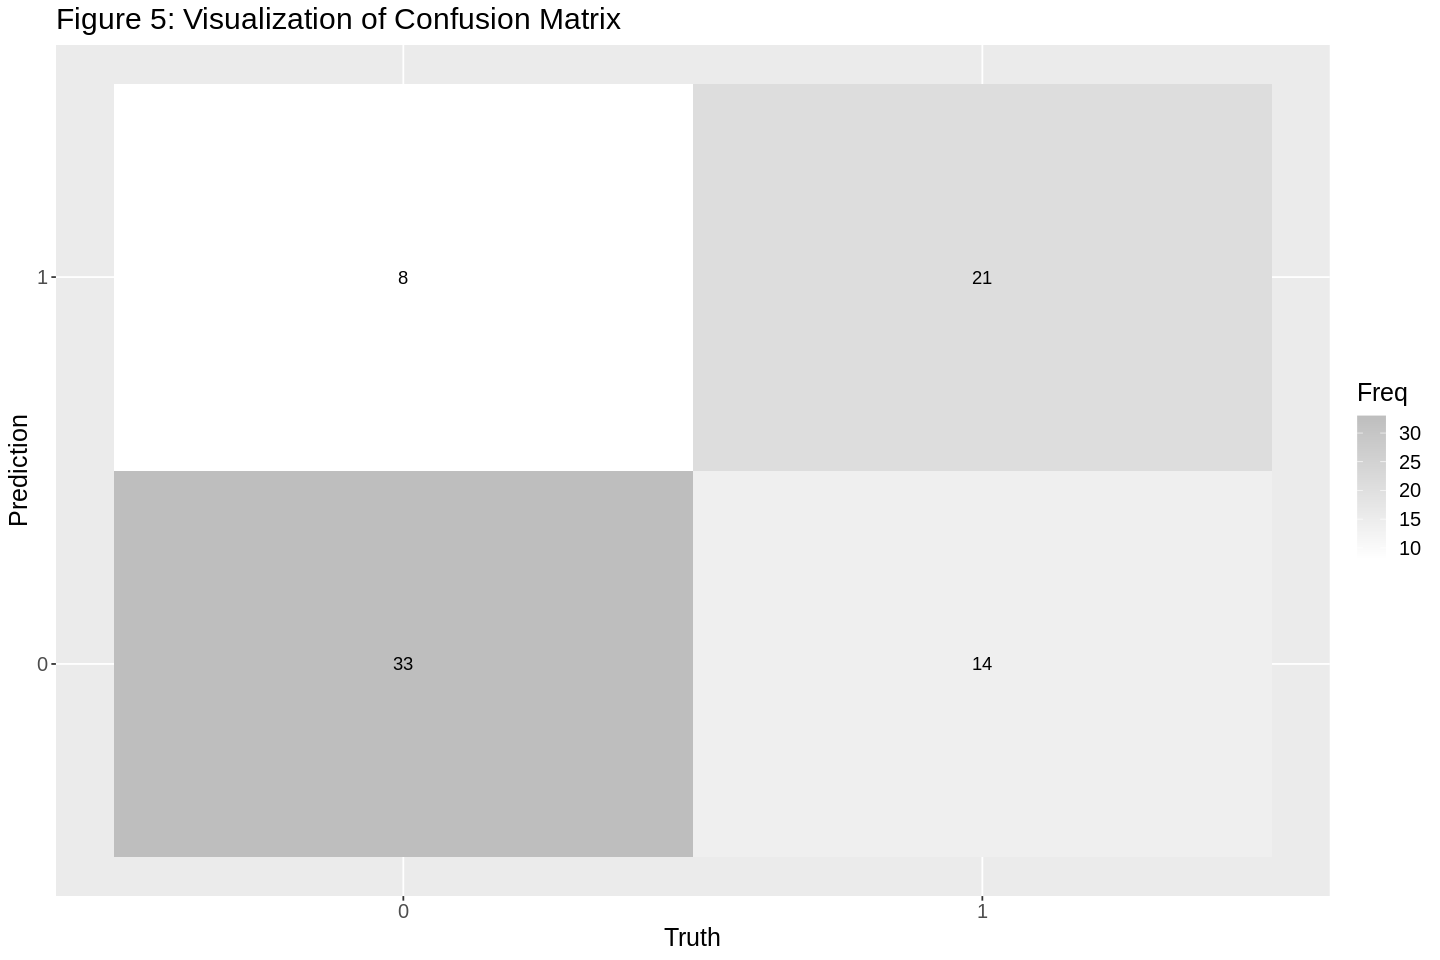

In [21]:
plot <- as.data.frame(confusion_mat$table)

ggplot(data = plot, aes(x = Truth, y = Prediction))+
    geom_tile(aes(fill = Freq))+
    geom_text(aes(label = Freq))+
    scale_fill_gradient(low = "white", high = "grey")+
    ggtitle("Figure 5: Visualization of Confusion Matrix")+
    theme(text = element_text(size = 15))


The confusion matrix found that the majority of errors in the model were due to incorrect predictions of class 1 (heart disease present). For the patients that really had heart disease, the matrix falsely reported 14 observations to be class 0 while 21 were correctly predicted to be class 1.  In the category of people without heart disease it incorrectly predicted 8 people as positive for heart disease while getting 33 correct. The model shows that the majority of the predictions were correct as seen in the darker frequency gradient squares. 


##### Step 13: Find Proportions of Raw Data set to support Analysis

We found the proportion of class 0 to class 1 in the raw data table “final_data” in order to determine if the relatively low accuracy was a result of unequal groupings of the initial data but found that this likely did not have an effect on the low accuracy because the data was split roughly 46 % class 1 and 54% class 0. This means that the initial groups sizes were almost balanced so likely did not impact the incorrect conclusions found in the confusion matrix. 

In [22]:
#Finding the proportion of how many have heart disease and how many does not have heart disease based on the original data set
#The proportion aims to show whether the raw data is overwhelmingly one category which would explain the low accuracy 

class_proportion <- final_data1|>
  group_by(num)|>
  summarize(class_proportion = n())

class_percentage <- class_proportion|>
    mutate(percentage_proportion = (class_proportion/303)*100)
class_percentage

num,class_proportion,percentage_proportion
<fct>,<int>,<dbl>
0,164,54.12541
1,139,45.87459


##### Table 9: Proportions of Raw Data set

#### Discussion

Our study found that the predictive model using resting blood pressure, maximum heart rate, sex, age, and cholesterol levels as leading risk factors for heart disease resulted in an accuracy of 71%. 

This is a moderate level of accuracy since our model is correct a majority of the time, however this is not satisfactory given the context of our predicted classes. The confusion matrix revealed that the majority of the errors were due to incorrect predictions of class 1 (heart disease present), further illustrated by our recall of 60%. This means that it often gave an "absent" prediction when heart disease was present, which could result in very dire consequences for potential patients. If we were to implement this model in a real medical setting, we would be sending roughly a quarter of our patients home with not only an incorrect diagnosis, but oftentimes one that does not provide any further care or inspection by doctors. With this in mind, we need to reflect on how to improve our model.

We note that our dataset is somewhat small in comparison to other datasets, having only 227 observations. If we were to build a new model predicting heart disease, we may want to find a dataset with more observations to improve the diversity of our dataset for more accurate representation of the correlations between our predictors. Given that our predictors are supported by literature findings, we believe the best method for improvement in predictor selection would be to follow the research to see if there are any additional predictors we can implement. We also note that there is a significant proportion of males in this dataset, and given that males are more prone to heart disease (5), this may have biased our results. Upon further analysis, we discovered that the initial data had a relatively balanced distribution of the two classes, with 54% for class 0 (no heart disease) and 46% for class 1 (heart disease). This suggests that the relatively low accuracy was not due to unequal groupings in the initial data.

We expected that higher levels of resting blood pressure, maximum heart rate and cholesterol levels would lead to a higher chance of having heart disease. Older people would also have a higher likelihood of having heart disease. Additionally, based on previous research, we expect males to have a higher chance of having heart disease due to the roles of estrogen and testosterone in the cardiovascular system (5). While our findings show a moderate level of accuracy in predicting heart disease, the results were not as high as we initially expected. Our  model's accuracy suggests that these factors alone might not provide a comprehensive understanding of heart disease risk, indicating that additional unknown factors may also be significant in determining heart disease risk.

Future research could investigate any other risk factors that might contribute to heart disease or explore possible interactions between risk factors. Additionally, the study could be expanded to include a broader population beyond Cleveland to assess whether the findings are consistent across different demographics and geographic locations. Future research could also explore the potential impact of other factors such as genetics, lifestyle, diabetes, and other unconsidered variables on heart disease risk.

Being better able to predict whether people have heart disease will allow for better diagnosis and assessment of risk factors that may contribute to heart disease. For example, if the data supports the idea that people with higher blood pressure are more prone to heart disease, then people can choose to eat foods that do not trigger high blood pressure to lower the chances of developing heart diseases.


#### References

1. Government of Canada. (2023). Heart Disease in Canada. Retrieved from https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html
2. Dua, D. and Graff, C. (2019). Heart Disease Data Set. Retrieved from the UCI Machine Learning Repository website: https://archive.ics.uci.edu/ml/datasets/Heart+Disease
3. Centers for Disease Control and Prevention. (2023). About Heart Disease. Retrieved from   https://www.cdc.gov/heartdisease/about.htm
4. Centers for Disease Control and Prevention. (2023). Heart Disease and Stroke. Retrieved from https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=High%20LDL%20cholesterol%20can%20double,%2C%20other%20organs%2C%20and%20legs.
5. Prabhavathi, K., Selvi, K. T., Poornima, K. N., & Sarvanan, A. (2014). Role of biological sex in normal cardiac function and in its disease outcome - a review. Journal of clinical and diagnostic research : JCDR, 8(8), BE01–BE4. https://doi.org/10.7860/JCDR/2014/9635.4771
6. National Institute on Aging. (2023). Heart Health and Aging.  Retrieved from https://www.nia.nih.gov/health/heart-health-and-aging#:~:text=and%20bottom%20chambers.-,How%20Your%20Heart%20Changes%20with%20Age,heart%20disease)%20and%20heart%20failure.
7. National Library of Medicine. (2013). When heart goes “BOOM” to fast. Heart rate greater than 80 as mortality predictor in acute myocardial infarction. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3751677/#:~:text=Numerous%20studies%20have%20shown%20that,high%20levels%20of%20total%20cholesterol%2C